<a href="https://colab.research.google.com/github/majbrittstenbog/SIMM71/blob/main/Kopi_af_lab2_nlp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nils-holmberg/socs-qmd/blob/main/jnb/lab2_nlp2.ipynb)

# load text data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#!pip install gdown
!gdown https://drive.google.com/uc?id=1HvfUSvri4I4AXJLb_kAn21-x4i_2BMAb

Downloading...
From: https://drive.google.com/uc?id=1HvfUSvri4I4AXJLb_kAn21-x4i_2BMAb
To: /content/2021_2023.xlsx
100% 13.4k/13.4k [00:00<00:00, 27.1MB/s]


In [ ]:
fp = "2021_2023.xlsx"
df = pd.read_excel(fp, header=None, names=['id','text'])
df.head()

,id,text
0,1,Vancouver secondhand shop marks 20 years of su...
1,2,PES Women: Europe must become a zero-tolerance...
2,3,Get worse before it gets better Alberta agenci...
3,4,Get worse before it gets better Alberta agenci...
4,5,New Jhb mayor Phalatse committed to GBV fight


In [ ]:
df.shape

(100, 2)

In [ ]:
# Convert to list
corpus = df.text.values.tolist()
corpus[:2]

['Vancouver secondhand shop marks 20 years of supporting women experiencing violence',
 'PES Women: Europe must become a zero-tolerance zone for gender-based violence']

In [ ]:
# Download necessary NLTK data
import nltk
nltk.download('popular')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

In [ ]:
# define data cleaning function
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

# clean data stored in a new list
clean_corpus = [clean(doc).split() for doc in corpus]

In [ ]:
clean_corpus

[['vancouver',
  'secondhand',
  'shop',
  'mark',
  '20',
  'year',
  'supporting',
  'woman',
  'experiencing',
  'violence'],
 ['pe',
  'woman',
  'europe',
  'must',
  'become',
  'zerotolerance',
  'zone',
  'genderbased',
  'violence'],
 ['get',
  'worse',
  'get',
  'better',
  'alberta',
  'agency',
  'say',
  'domestic',
  'violence',
  'increased'],
 ['get',
  'worse',
  'get',
  'better',
  'alberta',
  'agency',
  'struggle',
  'demand',
  'shadow',
  'pandemic'],
 ['new', 'jhb', 'mayor', 'phalatse', 'committed', 'gbv', 'fight'],
 ['gbvf',
  'fund',
  'ring',
  'jse',
  'trading',
  'bell',
  'mark',
  'start',
  '16',
  'day',
  'activism',
  'campaign'],
 ['white',
  'ribbon',
  'day',
  'violence',
  'woman',
  'bigger',
  'people',
  'appreciate'],
 ['moonga', 'k', 'stogie', 'share', 'thought', 'concert'],
 ['infographic', 'mapping', 'violence', 'woman'],
 ['wale', 'say', '‘no’', 'violence', 'woman', 'white', 'ribbon', 'day'],
 ['liberty', 'latin', 'america', 'join', 'g

# document term matrix (gensim approach)

![](https://raw.githubusercontent.com/nils-holmberg/socs-qmd/main/res/img/nlp-image_0-259d7a671398a16dc7cdfe05d89d4880.png)


In [ ]:
# Importing Gensim
import gensim
from gensim import corpora

In [ ]:
# Creating the term dictionary of our courpus that is of all the words (Sepcific to Genism syntax perspective),
# where every unique term is assigned an index.

dict_ = corpora.Dictionary(clean_corpus)

print(dict_)

Dictionary<381 unique tokens: ['20', 'experiencing', 'mark', 'secondhand', 'shop']...>


In [ ]:
# The dictionary had 18 unqiue words in the cleaned corpus.
for i in dict_.values():
    print(i)

20
experiencing
mark
secondhand
shop
supporting
vancouver
violence
woman
year
become
europe
genderbased
must
pe
zerotolerance
zone
agency
alberta
better
domestic
get
increased
say
worse
demand
pandemic
shadow
struggle
committed
fight
gbv
jhb
mayor
new
phalatse
16
activism
bell
campaign
day
fund
gbvf
jse
ring
start
trading
appreciate
bigger
people
ribbon
white
concert
k
moonga
share
stogie
thought
infographic
mapping
wale
‘no’
america
community
global
join
latin
liberty
access
activist
indirect
lack
mbekweni
pad
too
violation
young
30
next
abusive
draai
encourages
partner
speak
survivor
tarryn
experience
finland
one
relationship
report
three
child
exclusion
family
party
right
selfexclusion
third
candlelighting
cape
ceremony
govt
hold
kick
w
contributing
tunisia
3
cop
gauteng
lauds
life
rapist
securing
serial
supportive
term
elimination
ien
international
minister
statement
tackling
charity
girl
men
message
powerful
stop
towards
wythenshawe
prime
murder
canada
feel
find
someone
support
su

In [ ]:
# Converting list of documents (corpus) into Document Term Matrix using the dictionary
doc_term_matrix = [dict_.doc2bow(i) for i in clean_corpus]
doc_term_matrix

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1)],
 [(7, 1),
  (8, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1)],
 [(7, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 2),
  (22, 1),
  (23, 1),
  (24, 1)],
 [(17, 1),
  (18, 1),
  (19, 1),
  (21, 2),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1)],
 [(29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1)],
 [(2, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1)],
 [(7, 1), (8, 1), (40, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1)],
 [(52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1)],
 [(7, 1), (8, 1), (58, 1), (59, 1)],
 [(7, 1), (8, 1), (23, 1), (40, 1), (50, 1), (51, 1), (60, 1), (61, 1)],
 [(62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1)],
 [(8, 1),
  (23, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1)

# topic modeling (gensim approach)

In [ ]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

In [ ]:
# Running and Training LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=4, id2word=dict_, passes=1, random_state=0, eval_every=None)

In [ ]:
# Prints the topics with the indexes: 0,1,2 :
# we need to manually check whethere the topics are different from one another or not
#it does not give the names of the topics, only numbers. We are to name them ourselves. We have to try out
# different amounts of topics and look at the coherence to see if it is ideal or not.
ldamodel.print_topics()

[(0,
  '0.057*"woman" + 0.048*"violence" + 0.031*"day" + 0.026*"international" + 0.015*"elimination" + 0.011*"mark" + 0.009*"girl" + 0.009*"activist" + 0.008*"encourages" + 0.008*"gbv"'),
 (1,
  '0.057*"violence" + 0.032*"woman" + 0.024*"genderbased" + 0.023*"day" + 0.022*"end" + 0.012*"16" + 0.012*"child" + 0.012*"international" + 0.010*"support" + 0.010*"it"'),
 (2,
  '0.071*"violence" + 0.045*"genderbased" + 0.033*"day" + 0.025*"activism" + 0.022*"16" + 0.022*"woman" + 0.013*"fight" + 0.013*"get" + 0.010*"say" + 0.010*"action"'),
 (3,
  '0.042*"day" + 0.037*"woman" + 0.030*"activism" + 0.025*"16" + 0.023*"violence" + 0.021*"gbv" + 0.013*"launch" + 0.013*"international" + 0.012*"elimination" + 0.010*"campaign"')]

In [ ]:
# num_topics mean: how many topics want to extract the most important five words in each topic.
# num_words: the number of words that want per topic
print(ldamodel.print_topics(num_topics=4, num_words=5))

[(0, '0.057*"woman" + 0.048*"violence" + 0.031*"day" + 0.026*"international" + 0.015*"elimination"'), (1, '0.057*"violence" + 0.032*"woman" + 0.024*"genderbased" + 0.023*"day" + 0.022*"end"'), (2, '0.071*"violence" + 0.045*"genderbased" + 0.033*"day" + 0.025*"activism" + 0.022*"16"'), (3, '0.042*"day" + 0.037*"woman" + 0.030*"activism" + 0.025*"16" + 0.023*"violence"')]


In [ ]:
# printing the topic associations with the documents
# here we see how different topics are associated with the topics.
# tweets are not usually ideal for topic modelling. Its ideal way is to use is with longer texts.
count = 0
for i in ldamodel[doc_term_matrix]:
    print("doc : ",count,i)
    count += 1

doc :  0 [(0, 0.93047816), (1, 0.022998272), (2, 0.02361651), (3, 0.022907047)]
doc :  1 [(0, 0.85705143), (1, 0.026625933), (2, 0.091013364), (3, 0.025309285)]
doc :  2 [(0, 0.022836886), (1, 0.022851443), (2, 0.931234), (3, 0.023077661)]
doc :  3 [(0, 0.022747327), (1, 0.022885323), (2, 0.9316185), (3, 0.022748888)]
doc :  4 [(0, 0.032049615), (1, 0.031509444), (2, 0.9026099), (3, 0.033831064)]
doc :  5 [(0, 0.9357811), (1, 0.020188462), (2, 0.021654215), (3, 0.022376254)]
doc :  6 [(0, 0.9134578), (1, 0.028368054), (2, 0.02924042), (3, 0.028933732)]
doc :  7 [(0, 0.035766184), (1, 0.035759017), (2, 0.8927047), (3, 0.03577013)]
doc :  8 [(0, 0.05402972), (1, 0.05357685), (2, 0.05410387), (3, 0.83828956)]
doc :  9 [(0, 0.029623497), (1, 0.028491378), (2, 0.9122883), (3, 0.029596744)]
doc :  10 [(0, 0.035738263), (1, 0.0369285), (2, 0.8913885), (3, 0.03594477)]
doc :  11 [(0, 0.021504212), (1, 0.021070711), (2, 0.021198766), (3, 0.9362263)]
doc :  12 [(0, 0.036398273), (1, 0.03637391),

# topic modeling optimization (gensim)

In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [ ]:
# Convert to list
data = df.text.values.tolist()

In [ ]:
print(data[:2])

['Vancouver secondhand shop marks 20 years of supporting women experiencing violence', 'PES Women: Europe must become a zero-tolerance zone for gender-based violence']


In [ ]:
import re

if False:
    df['text'] = df['text'].str.replace("&#039;", "'", regex=False)
    # Remove Emails
    data = [re.sub(r'\S*@\S*\s?', '', str(sent)) for sent in data]
    # Remove new line characters
    data = [re.sub(r'\s+', ' ', str(sent)) for sent in data]
    # Remove distracting single quotes
    data = [re.sub(r"\'", "", str(sent)) for sent in data]
    print(data[:2])

In [ ]:
# spacy for nlp analysis
import spacy

def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)

lemmatized_texts = lemmatization(data)
print(lemmatized_texts[0][0:50])

mark year support woman experience violence


In [ ]:
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return (final)

data_words = gen_words(lemmatized_texts)

print(data_words[0][0:5])

['mark', 'year', 'support', 'woman', 'experience']


In [ ]:
id2word = corpora.Dictionary(data_words)

corpus = []
for text in data_words:
    new = id2word.doc2bow(text)
    corpus.append(new)

print(corpus[0][0:20])


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]


In [ ]:
word = id2word[[0][:1][0]]
print(word)

experience


In [ ]:
id2word[0]

'experience'

In [ ]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('experience', 1),
  ('mark', 1),
  ('support', 1),
  ('violence', 1),
  ('woman', 1),
  ('year', 1)]]

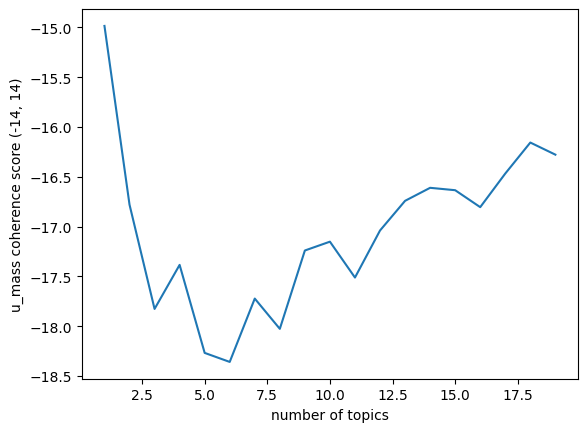

In [ ]:
# finding the ideal number of topics.
topics = []
score = []

for i in range(1,20,1):
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=i, iterations=10, passes=10, random_state=100)
  cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=id2word, coherence='u_mass')
  topics.append(i)
  score.append(cm.get_coherence())

_=plt.plot(topics, score)
_=plt.xlabel('number of topics')
_=plt.ylabel('u_mass coherence score (-14, 14)')
plt.show()

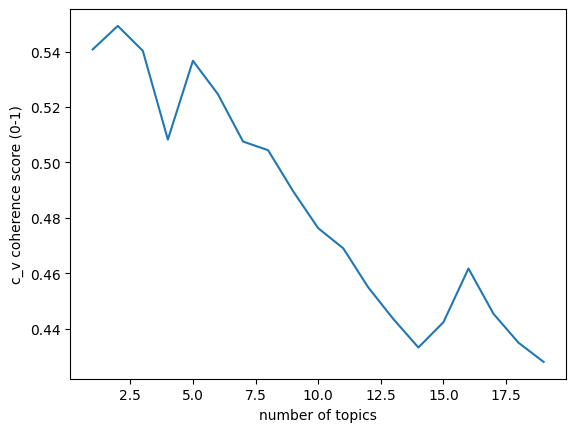

In [ ]:
topics = []
score = []

for i in range(1,20,1):
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=i, iterations=10, passes=10, random_state=100)
  cm = CoherenceModel(model=lda_model, texts=data_words, corpus=corpus, dictionary=id2word, coherence='c_v')
  topics.append(i)
  score.append(cm.get_coherence())

_=plt.plot(topics, score)
_=plt.xlabel('number of topics')
_=plt.ylabel('c_v coherence score (0-1)')
plt.show()

In [ ]:
# modeling with optimal number of topics
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, iterations=10, passes=10, random_state=100)


In [ ]:
# Print topics
lda_model.print_topics(-1)

[(0,
  '0.099*"woman" + 0.063*"violence" + 0.020*"end" + 0.016*"girl" + 0.013*"say" + 0.013*"get" + 0.010*"activist" + 0.010*"statement" + 0.010*"invest" + 0.010*"prevent"'),
 (1,
  '0.069*"violence" + 0.060*"base" + 0.053*"day" + 0.041*"activism" + 0.037*"gender" + 0.017*"launch" + 0.015*"campaign" + 0.014*"call" + 0.013*"support" + 0.012*"child"')]

# topic modeling visualization (gensim)

In [ ]:
# fix dependency
!pip install --upgrade pandas
# topic modeling plotting tools
!pip install -q pyLDAvis
import pyLDAvis
import pyLDAvis.gensim

In [ ]:
# Visualize the topics
#pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
pyLDAvis.display(vis)
#vis

In [ ]:
# Save the report
pyLDAvis.save_html(vis, 'lab2-nlp2-topics.html')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# topic modelling with gensim and pyldavis
- [https://nils-holmberg.github.io/cca-nlp/jnb/scom-gpols-topics.html](https://nils-holmberg.github.io/cca-nlp/jnb/scom-gpols-topics.html)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
